<a href="https://www.kaggle.com/code/janadarwish/nti-lap-12?scriptVersionId=264114698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#3shan el visualization w arsem graphs
from sklearn.preprocessing import LabelEncoder, StandardScaler
#3shan el visualization w arsem graphs
from sklearn.cluster import SpectralBiclustering

In [3]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [4]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [5]:
le = LabelEncoder()
#bahawel el text le nums akene bashafar
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = le.fit_transform(df[col]) 
#fit m3nah yt3alem el keyam el duplicated
#transform bykhaly kol el heads b keema mo3yna

In [6]:
print(df)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  
0                          1          72             72             74  
1                          0          69         

In [7]:
X = df.values #ha7awel el dataframe le matrix feha col w rows
X = StandardScaler().fit_transform(X)
#fit hate7sebly mean w standard deviation (std)
#transform bytra7 el mean w ye2sem 3ala (std)

In [8]:
print(X)

[[-0.96462528 -1.01504393 -0.81264039 ...  0.39002351  0.19399858
   0.39149181]
 [-0.96462528 -0.15044092  0.82795259 ...  0.19207553  1.42747598
   1.31326868]
 [-0.96462528 -1.01504393  0.28108826 ...  1.57771141  1.77010859
   1.64247471]
 ...
 [-0.96462528 -0.15044092 -0.26577606 ... -0.46775108  0.12547206
  -0.20107904]
 [-0.96462528  0.71416208  0.82795259 ...  0.12609287  0.60515772
   0.58901542]
 [-0.96462528  0.71416208  0.82795259 ...  0.71993682  1.15336989
   1.18158627]]


In [9]:
model = SpectralBiclustering(n_clusters=(3, 3), random_state=42)
#ya3ny hn2asem el rows le 3 clusters w el col le 3 clusters
#tab el random state? ygeb randomness t3ml noise moklhtalefa kol mara ashghal el code
model.fit(X)
#hamaran el model beta3y

SpectralBiclustering(n_clusters=(3, 3), random_state=42)

In [10]:
#ba3d ma el model ytdarab 3ala el data
fit_data = X[np.argsort(model.row_labels_)]
#(model.row_labels_) hyrga3ly ana labels le kol row
#np.argsort(model.row_labels_) de terateb el rows el khadtaha asghar le akbar
fit_data = fit_data[:, np.argsort(model.column_labels_)]
#nafs el haga bs columns :D 

In [11]:
fit_data

array([[-0.81264039, -1.01504393,  0.74188112, ...,  0.19399858,
         0.39149181, -0.96462528],
       [-1.35950471,  1.57876509,  0.74188112, ..., -0.55979316,
        -0.66196748,  1.03667198],
       [-0.26577606, -1.01504393,  0.74188112, ..., -0.01158098,
        -0.00355543,  1.03667198],
       ...,
       [ 1.37481692, -0.15044092, -1.34792485, ..., -0.76537273,
        -1.05701471, -0.96462528],
       [-0.26577606,  1.57876509, -1.34792485, ..., -1.65621751,
        -1.84710918, -0.96462528],
       [-0.26577606,  0.71416208, -1.34792485, ..., -2.06737664,
        -2.24215641,  1.03667198]])

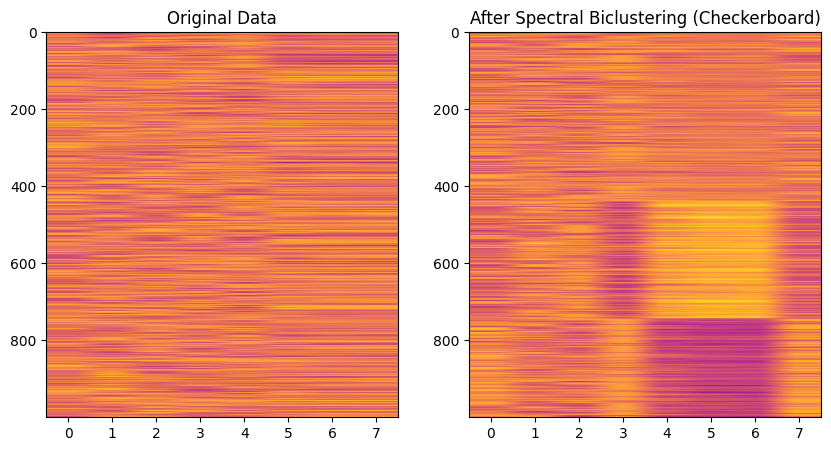

In [12]:
plt.figure(figsize=(10, 5)) #width=10, height=5
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(X, cmap="plasma", aspect="auto")

plt.subplot(1, 2, 2)
plt.title("After Spectral Biclustering (Checkerboard)")
plt.imshow(fit_data, cmap="plasma", aspect="auto")

plt.show()

#subplot y3ny h3mel grid feha 1 row 2 col
#w el rakam 'z' in (x,y,z) da byolo anhy rasma yersemha
#[cmap="plasma"] de bt3ml lon
#[aspect="auto"] de btkhaly el lon monaseb m3 el values

hena el blocks bta3et el talaba el shabah ba3d etgama3o m3 ba3d w el columns el shabah ba3d etgma3o brdo f fe morab3at mtlwena w morab3at 3shwa2eya